In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


# CREDIT SCORING
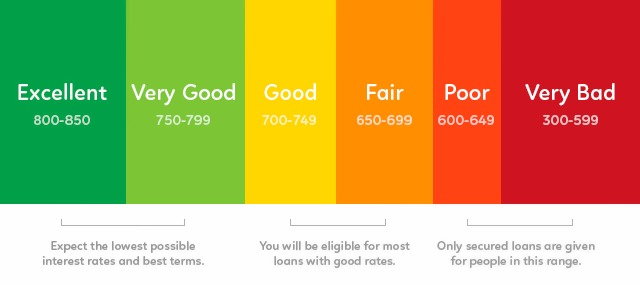

## Variables

**Usia** : 21 s/d 100
 - 1 : >64
 - 2 : 21 - 64

**Jumlah Pinjaman** : 500000 s/d 3000000
 
**Tenor (minggu)** = 2 s/d 20 minggu
 
**Pemasukan** = no range
 
**Tanggungan** = 0 s/d inf
 
**Pekerjaan** 
 - 1 : Wirausaha/ Pedagang/ Pekerja Lepas
 - 2 : Buruh/Guru/Dosen

**Peminjaman ke-** 
 - 1 : 1 
 - 2 : 2- 3 
 - 3 : > 3
 
**Hari telat bayar** 
 - 0 : tidak pernah 
 - 1 : < 1 minggu 
 - 2 : 2 - 4 minggu 
 - 3 : > 4 minggu
 
**Pernah Donasi** 
 - 0 : tidak pernah 
 - 1 : 1 - 3
 - 2 : 3- 5
 - 3 : >= 6

## Open Datasets with Pandas 

In [125]:
with open("./Dummy Datasets FICO Scoring - V3 - Final.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,pinjaman ke,telat bayar,donasi,score

Each data point looks like this:

2,500000,20,4800000,0,2,3,0,10,849.969



In [126]:
data  = pd.read_csv(r'./Dummy Datasets FICO Scoring - V3 - Final.csv', delimiter=',')
data.head()

,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,pinjaman ke,telat bayar,donasi,score
0,2,500000,20,4800000,0,2,3,0,10,849.969
1,1,3000000,4,1500000,5,1,1,3,0,110.833
2,1,1600000,3,1800000,3,1,2,1,3,254.156
3,2,1400000,16,3000000,4,1,1,3,8,531.553
4,1,1200000,16,2500000,4,1,2,3,1,428.156


## Exploratory Data Analyis (EDA)

In [127]:
# column list
data.columns

Index(['usia', 'pinjaman', 'tenor', 'pemasukan', 'tanggungan', 'pekerjaan',
       'pinjaman ke', 'telat bayar', 'donasi', 'score'],
      dtype='object')

In [128]:
# statistical description of the data
data.describe()

,usia,pinjaman,tenor,pemasukan,tanggungan,pekerjaan,pinjaman ke,telat bayar,donasi,score
count,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.556400,1.471570e+06,8.885900,3.199450e+06,2.470000,1.328900,2.216300,1.853400,4.998000,544.869334
std,0.496834,6.758450e+05,5.184146,1.296915e+06,1.705518,0.469837,0.743216,0.989549,3.165659,153.203369
min,1.000000,5.000000e+05,3.000000,1.200000e+06,0.000000,1.000000,1.000000,0.000000,0.000000,110.833000
25%,1.000000,1.000000e+06,4.000000,2.000000e+06,1.000000,1.000000,2.000000,1.000000,2.000000,422.479000
50%,2.000000,1.400000e+06,8.000000,3.000000e+06,2.000000,1.000000,2.000000,2.000000,5.000000,560.989000
75%,2.000000,1.900000e+06,12.000000,4.500000e+06,4.000000,2.000000,3.000000,3.000000,8.000000,669.323250
max,2.000000,3.000000e+06,20.000000,5.000000e+06,5.000000,2.000000,3.000000,3.000000,10.000000,849.969000


In [129]:
# additional info about data: type, number of nulls, number of rows and others
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   usia         10000 non-null  int64  
 1   pinjaman     10000 non-null  int64  
 2   tenor        10000 non-null  int64  
 3   pemasukan    10000 non-null  int64  
 4   tanggungan   10000 non-null  int64  
 5   pekerjaan    10000 non-null  int64  
 6   pinjaman ke  10000 non-null  int64  
 7   telat bayar  10000 non-null  int64  
 8   donasi       10000 non-null  int64  
 9   score        10000 non-null  float64
dtypes: float64(1), int64(9)
memory usage: 781.4 KB


In [130]:
# the number of rows and columns in the data
print('Total Row:', data.shape[0])
print('Total Columns:', data.shape[1])
data.shape

Total Row: 10000
Total Columns: 10


(10000, 10)

## Data Cleaning

### -- *Check Missing Value*

In [131]:
# Check missing value
data.isnull().sum()

usia           0
pinjaman       0
tenor          0
pemasukan      0
tanggungan     0
pekerjaan      0
pinjaman ke    0
telat bayar    0
donasi         0
score          0
dtype: int64

In [132]:
print("Null values : ", data.isnull().sum().sum())
print("Shape of data: ", data.shape)

Null values :  0
Shape of data:  (10000, 10)


### -- *Check Duplicate*

In [133]:
#Check duplicate data
print("Data duplicated: ", data.duplicated().sum())

Data duplicated:  19


## Data Preprocessing

### -- *Spitting features and label*

In [134]:
features = data.drop(columns=['score'])
label = data[['score']]

print(features.shape)
print(label.shape)

features.columns, label.columns

(10000, 9)
(10000, 1)


(Index(['usia', 'pinjaman', 'tenor', 'pemasukan', 'tanggungan', 'pekerjaan',
        'pinjaman ke', 'telat bayar', 'donasi'],
       dtype='object'),
 Index(['score'], dtype='object'))

### -- *Check Data Type*

Menyesuaikan tipe data sesuai dengan metadata yang diberikan

- **Categorical** (usia, pekerjaan, pinjaman ke, telat bayar, donasi )
- **Numeric** (jumlah pinjaman, tenor, pemasukan, tanggungan)

In [135]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [136]:
col_cat_label = ['score']
label[col_cat_label] = label[col_cat_label].astype('int64')
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


c:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [137]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   usia         10000 non-null  int64
 1   pinjaman     10000 non-null  int64
 2   tenor        10000 non-null  int64
 3   pemasukan    10000 non-null  int64
 4   tanggungan   10000 non-null  int64
 5   pekerjaan    10000 non-null  int64
 6   pinjaman ke  10000 non-null  int64
 7   telat bayar  10000 non-null  int64
 8   donasi       10000 non-null  int64
dtypes: int64(9)
memory usage: 703.2 KB


In [138]:
col_cat_features = ['usia' , 'pekerjaan' , 'pinjaman ke' , 'telat bayar' , 'donasi' ]

features[col_cat_features] = features[col_cat_features].astype('category')

In [139]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   usia         10000 non-null  category
 1   pinjaman     10000 non-null  int64   
 2   tenor        10000 non-null  int64   
 3   pemasukan    10000 non-null  int64   
 4   tanggungan   10000 non-null  int64   
 5   pekerjaan    10000 non-null  category
 6   pinjaman ke  10000 non-null  category
 7   telat bayar  10000 non-null  category
 8   donasi       10000 non-null  category
dtypes: category(5), int64(4)
memory usage: 362.4 KB


## Normalize Data

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

## Split Into Train and Test

In [141]:
X_train, X_validate, y_train, y_validate = train_test_split(
    features, label, test_size=0.3, shuffle=True)

In [142]:
print(X_train.shape)
print(y_train.shape)

(7000, 9)
(7000, 1)


In [143]:
print(X_validate.shape)
print(y_validate.shape)

(3000, 9)
(3000, 1)


In [144]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(units=1, input_shape=[6], activation='linear'),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(units=1),
    ])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 1e-1),
            # loss='mean_squared_error',
            loss = tf.keras.losses.Huber(),
            metrics=['mae'])

In [145]:
mc = ModelCheckpoint('Credit Scoring - V3.h5', monitor='val_mae', mode='min', verbose=1, save_best_only=True)

In [146]:
# Train the model
history = model.fit(X_train, 
                y_train, 
                epochs=100,
                callbacks = [mc],
                validation_data=(X_validate, y_validate))

Epoch 1/100
206/219 [===========================>..] - ETA: 0s - loss: 143.5491 - mae: 144.0476
Epoch 1: val_mae improved from inf to 48.45277, saving model to Credit Scoring - V3.h5
219/219 [==============================] - 2s 7ms/step - loss: 137.9605 - mae: 138.4590 - val_loss: 47.9554 - val_mae: 48.4528
Epoch 2/100
214/219 [============================>.] - ETA: 0s - loss: 48.9147 - mae: 49.4127
Epoch 2: val_mae improved from 48.45277 to 46.53624, saving model to Credit Scoring - V3.h5
219/219 [==============================] - 1s 4ms/step - loss: 49.0039 - mae: 49.5019 - val_loss: 46.0392 - val_mae: 46.5362
Epoch 3/100
209/219 [===========================>..] - ETA: 0s - loss: 47.8154 - mae: 48.3135
Epoch 3: val_mae did not improve from 46.53624
219/219 [==============================] - 1s 4ms/step - loss: 47.6857 - mae: 48.1838 - val_loss: 50.3870 - val_mae: 50.8852
Epoch 4/100
205/219 [===========================>..] - ETA: 0s - loss: 50.1235 - mae: 50.6216
Epoch 4: val_mae di

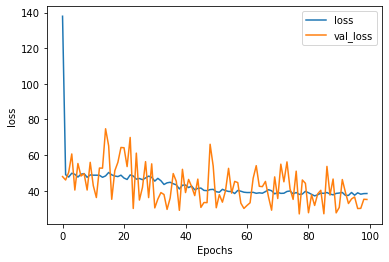

In [147]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
# plot_graphs(history, "metrics")
plot_graphs(history, "loss")

In [148]:
print(type(y_validate))
y_pred = pd.DataFrame(model.predict(X_validate), columns = ['y_pred'])
print(type(y_pred))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [149]:
y_pred.describe()

,y_pred
count,3000.000000
mean,526.217590
std,141.787292
min,92.986679
25%,420.444427
50%,538.041901
75%,637.361969
max,857.120911


In [150]:
print(y_validate)
print(y_pred)

      score
4442    478
7480    500
6420    642
7033    728
5971    718
...     ...
7388    664
6328    358
9461    594
9529    504
737     609

[3000 rows x 1 columns]
          y_pred
0     491.945221
1     439.958557
2     631.386475
3     732.459534
4     753.618286
...          ...
2995  627.105286
2996  338.822357
2997  576.233521
2998  414.168152
2999  570.150330

[3000 rows x 1 columns]


In [151]:
yv = y_validate.reset_index()
yvv = yv.reset_index()
print(yvv)

yp = y_pred.reset_index()
print(yp)

      level_0  index  score
0           0   4442    478
1           1   7480    500
2           2   6420    642
3           3   7033    728
4           4   5971    718
...       ...    ...    ...
2995     2995   7388    664
2996     2996   6328    358
2997     2997   9461    594
2998     2998   9529    504
2999     2999    737    609

[3000 rows x 3 columns]
      index      y_pred
0         0  491.945221
1         1  439.958557
2         2  631.386475
3         3  732.459534
4         4  753.618286
...     ...         ...
2995   2995  627.105286
2996   2996  338.822357
2997   2997  576.233521
2998   2998  414.168152
2999   2999  570.150330

[3000 rows x 2 columns]


<AxesSubplot:xlabel='index', ylabel='y_pred'>

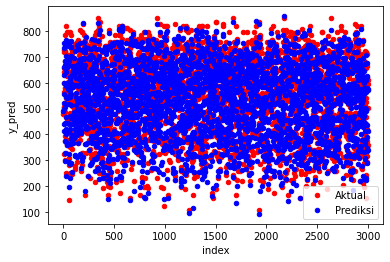

In [156]:
ax = yvv.plot(kind='scatter',x='level_0', y='score',
                                           color='Red', label='Aktual')
yp.plot(kind='scatter', x='index', y='y_pred',
                                          color='Blue', label='Prediksi', ax=ax)

In [157]:
y_val = y_validate['score'].to_list()
y_pred = y_pred['y_pred'].to_list()

TypeError: list indices must be integers or slices, not str

In [158]:
list_y = pd.DataFrame(np.column_stack([y_val, y_pred]), 
                               columns=['y_val', 'y_pred'])

<AxesSubplot:>

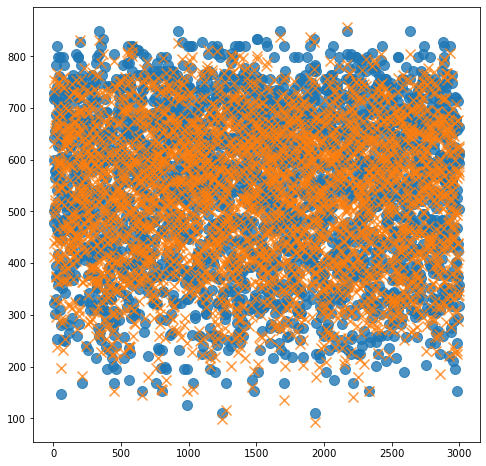

In [159]:
df1 = [2.5, 2.5, 2, 3, 4, 3.5]
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(ax=ax, x=df1)

index = list(range(1,3001))

# sns scatter, with regression fit turned off
sns.regplot(x=np.array(index), y=np.array(list_y['y_val']), scatter=True, fit_reg=False, marker='o',
            scatter_kws={"s": 100})  # the "s" key in `scatter_kws` modifies the size of the marker
# sns scatter, with regression fit turned off
sns.regplot(x=np.array(index), y=np.array(list_y['y_pred']), scatter=True, fit_reg=False, marker='x',
            scatter_kws={"s": 100})  # the "s" key in `scatter_kws` modifies the size of the marker

# Convert Model to TFLite

In [160]:
new_model = tf.keras.models.load_model('./Credit Scoring - V3.h5')

# Check its architecture
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 9)                 0         
                                                                 
 dense_10 (Dense)            (None, 10)                100       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [161]:
CREDIT_SCORE_SAVED_MODEL = "Credit Scoring - V3"

In [162]:
tf.saved_model.save(new_model, CREDIT_SCORE_SAVED_MODEL)

INFO:tensorflow:Assets written to: Credit Scoring - V3\assets


In [163]:
loaded = tf.saved_model.load(CREDIT_SCORE_SAVED_MODEL)

In [164]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'flatten_5_input': TensorSpec(shape=(None, 9), dtype=tf.float32, name='flatten_5_input')})
{'dense_11': TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_11')}


In [165]:
converter = tf.lite.TFLiteConverter.from_saved_model(CREDIT_SCORE_SAVED_MODEL)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [166]:
tflite_model = converter.convert()
tflite_model_file = 'Credit Scoring - V3.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="Credit Scoring - V3.tflite")
# interpreter = tf.lite.Interpreter(model_path="regression.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

[{'name': 'serving_default_flatten_6_input:0',
  'index': 0,
  'shape': array([1, 9]),
  'shape_signature': array([-1,  9]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 8,
  'shape': array([1, 1]),
  'shape_signature': array([-1,  1]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [ ]:
X_validate[1]

array([ 0.89289874,  0.04206796, -0.55670584,  0.92574293,  1.48349466,
       -0.70006492, -1.63661889,  0.14815577, -1.57889704])

In [ ]:
np_res_im = np.array(X_validate[0])
np_res_im = (np_res_im).astype('float32')
np_res_im

array([ 0.89289874,  0.1900383 , -0.94251674,  0.9257429 , -0.8619515 ,
       -0.7000649 ,  1.0545245 ,  0.14815576,  1.5801606 ], dtype=float32)

In [ ]:
print(input_details[0]['shape'])
print(np_res_im.shape)

[1 9]
(9,)


In [ ]:
if len(np_res_im.shape) == 1:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np_res_im.shape)

(1, 9)


In [ ]:
output_data.shape

(1, 1)

In [ ]:
predictions = new_model.predict(X_validate)

In [ ]:
y_validate

In [ ]:
print('prediction from model.h5: ' + str(predictions[0]))
print('prediction from model.tflite: ' + str(output_data))

prediction from model.h5: [790.95056]
prediction from model.tflite: [[790.95044]]


In [ ]:
print('Test Data:\n')
print('{"instances": [\n', np.array2string(X_validate[1], separator=', '), '\n]}')
print('Expected Result:', predictions[1])
print('Actual Labels:', y_validate[1])

In [ ]:
print('Test Data:\n')
print('{"instances": [\n', np.array2string(X_validate[2], separator=', '), '\n]}')
print('Expected Result:', predictions[2])
print('Actual Labels:', y_validate[2])